In [39]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
cours = pd.read_csv('my_courses.csv')
text_cours = pd.read_csv('courses_info.csv')

In [5]:
cours

,titreCours,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
0,Classez_et_segmentez_des_données_visuelles,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
1,Initiez-vous_à_la_statistique_inférentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
2,Maîtrisez_les_bases_des_probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
3,Découvrez_les_librairies_Python_pour_la_Data_S...,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
4,Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541
5,Initiez-vous_à_l'algèbre_relationnelle_avec_le...,192,14,92.0,20.0,2,25,0.500000,4,25,4449026
6,Maintenez-vous_à_jour_en_développement,192,80,NaN,2.0,1,3,NaN,0,145,4057661
7,Entraînez_un_modèle_prédictif_linéaire,193,65,84.0,10.0,2,9,0.500000,2,182,4444646
8,Explorez_vos_données_avec_des_algorithmes_non_...,193,75,85.0,15.0,3,13,0.666667,3,22,4379436
9,Décrivez_et_nettoyez_votre_jeu_de_données,195,3,95.0,15.0,2,24,0.750000,4,13,4525266


In [6]:
text_cours

,title,charge-e-de-gestion-des-ressources-humaines,manager-rh,gestionnaire-de-paie,data-architect,developpeur-se-dapplication-python,developpeur-web-junior,community-manager,responsable-marketing-operationnel,developpeur-se-d-application-php-symfony,data-scientist,expert-e-en-strategie-marketing-et-communication,data-analyst,theme
0,Apprenez à gérer les conflits,True,True,True,False,False,False,False,False,False,False,False,False,RH
1,Réalisez des calculs distribués sur des donnée...,False,False,False,True,False,False,False,False,False,False,False,False,data
2,Managez une équipe au quotidien,False,True,False,False,False,False,False,False,False,False,False,False,RH
3,Gérez votre code avec Git et GitHub,False,False,False,False,True,True,False,False,False,False,False,False,dev
4,Lancez une campagne de publicité avec Google A...,False,False,False,False,False,False,True,True,False,False,False,False,marketing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,Initiez-vous à l'algèbre relationnelle avec le...,False,False,False,False,False,False,False,False,False,False,False,True,data
108,Gérez la performance de vos collaborateurs,False,True,False,False,False,False,False,False,False,False,False,False,RH
109,"""Handicap et entreprise"": intégrez durablement...",True,True,False,False,False,False,False,False,False,False,False,False,RH
110,Animez une communauté Facebook,True,False,False,False,False,False,True,False,False,False,False,False,RH & marketing


In [7]:
db = text_cours.loc[text_cours['data-analyst']==True]
db[['data-analyst','title']]

,data-analyst,title
13,True,Bienvenue parmi les étudiants !
23,True,Démarrez votre projet avec Python
30,True,Apprenez à apprendre
36,True,Réalisez une analyse exploratoire de données
59,True,Analysez et modélisez des séries temporelles
63,True,Comprendre le Web
75,True,Réalisez des rapports statistiques clairs et i...
95,True,Décrivez et nettoyez votre jeu de données
99,True,Initiez-vous à la statistique inférentielle
107,True,Initiez-vous à l'algèbre relationnelle avec le...


In [15]:
v1 = [-43,12,10,95,1254,-847]
v2 = [-2,12,10,7,-8,4]

In [16]:
print(np.var(v1))

377080.4722222222


In [17]:
print(np.var(v2))

48.138888888888886


In [19]:
print(np.var([100,95]))

6.25


In [21]:
print(np.var([70,65]))

6.25


In [29]:
# Notre matrice de base : 
X = [[12,    30,    80,  -100],
     [-1000, 12,    -23,  10],
     [14,    1000,  0,    0]]

# Version pandas : 
X = pd.DataFrame(X)

In [30]:
X

,0,1,2,3
0,12,30,80,-100
1,-1000,12,-23,10
2,14,1000,0,0


In [31]:
X.describe()

,0,1,2,3
count,3.000000,3.000000,3.000000,3.000000
mean,-324.666667,347.333333,19.000000,-30.000000
std,584.856678,565.297562,54.064776,60.827625
min,-1000.000000,12.000000,-23.000000,-100.000000
25%,-494.000000,21.000000,-11.500000,-50.000000
50%,12.000000,30.000000,0.000000,0.000000
75%,13.000000,515.000000,40.000000,5.000000
max,14.000000,1000.000000,80.000000,10.000000


In [32]:
scaler = StandardScaler()

In [34]:
scaler.fit(X)

StandardScaler()

In [36]:
X_scaler = scaler.transform(X)
X_scaler

array([[ 0.70501165, -0.68751822,  1.38185049, -1.40942772],
       [-1.4142115 , -0.7265161 , -0.95143804,  0.80538727],
       [ 0.70919984,  1.41403432, -0.43041245,  0.60404045]])

In [40]:
X_scaler = pd.DataFrame(X_scaler)
X_scaler.describe().round(2)

,0,1,2,3
count,3.00,3.00,3.00,3.00
mean,0.00,0.00,0.00,0.00
std,1.22,1.22,1.22,1.22
min,-1.41,-0.73,-0.95,-1.41
25%,-0.35,-0.71,-0.69,-0.40
50%,0.71,-0.69,-0.43,0.60
75%,0.71,0.36,0.48,0.70
max,0.71,1.41,1.38,0.81


# -----------------------------------------------------------------------------------------

In [7]:
iris = datasets.load_iris()


In [18]:
X = iris.data
pd.DataFrame(X)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
liste_inertie=[]

k_list = range(1,10)

for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    liste_inertie.append(kmeans.inertia_)

In [28]:
liste_inertie

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571816,
 46.44618205128205,
 39.03998724608725,
 34.47097835497836,
 30.186555194805194,
 27.86291131237184]

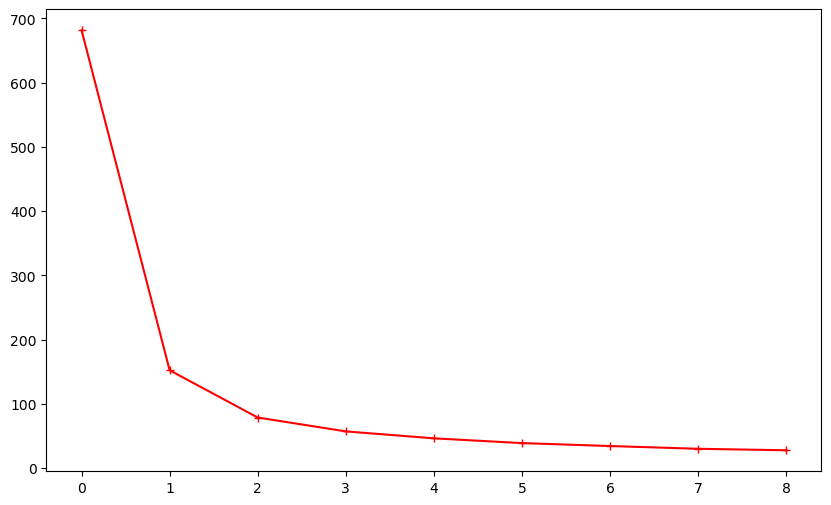

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(liste_inertie, color="r", marker='+')

# Clustering

In [41]:
iris = datasets.load_iris()

In [46]:
X = iris.data

In [48]:
X = pd.DataFrame(X)

In [49]:
Z = linkage(X, method="ward")

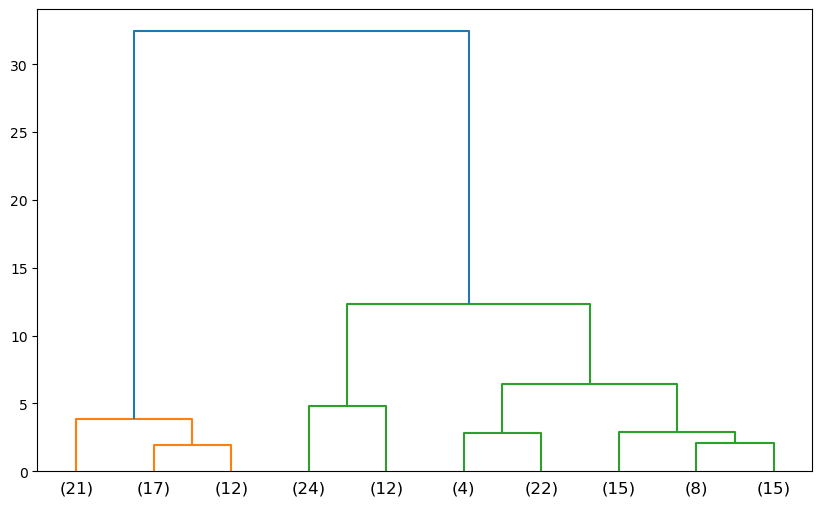

In [57]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
_ = dendrogram(Z, p=10,truncate_mode="lastp", ax=ax)